## Problem 1: Set up Github and clone assignment repo. 


Go to http://www.github.com and create an account.
Send your Github username to dg2991@columbia.edu.
Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools.
When I have received your email, you should get a confirmation that you have been added to the repo.
Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
Follow the instructions to clone that repo to your local machine.
You should type a command like:
$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git

Next: Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)

The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

$ git add mynotebooksolutions.ipynb

$ git commit -m "added my homework"

$ git push origin master

## Problem 2: Sales Data Analysis

In [2]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np
import math
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df[['TV','radio']]
df.shape

(200, 4)

#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges
Use df.boxplot()

<function matplotlib.pyplot.show>

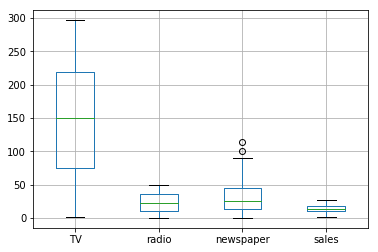

In [4]:
df.boxplot()
plt.show

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

D:\Users\siyi\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


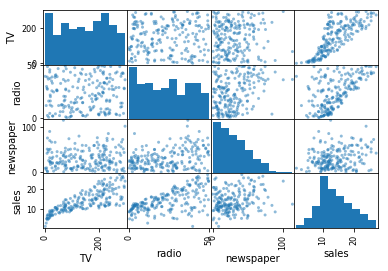

In [5]:
from pandas.tools.plotting import scatter_matrix 

scatter_matrix(df)
plt.show()

Which of the variables seem correlated with one another? Which don't? Explain your answer

There are obvious positive relationships between TV and sales, radio and sales, while relationships between other variable pairs are insignificant.



### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [6]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [7]:
# Code here
y = df[['sales']]
#y.head()

b) Set X to be just the features described above in df

In [8]:
# Code here
x = df[['TV','radio','newspaper']]
x.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [9]:
# Code here
#size = len(df)

# Split the data into training/testing sets
#X_train = X[0:int(size*0.8)]
#X_test = X[int(size*0.8):]

# Split the targets into training/testing sets
#y_train = y[0:int(size*0.8)]
#y_test = y[int(size*0.8):]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)

d) Train model on training data, and make predictions on testing data

In [10]:
# Code here
regr = LinearRegression()
# Train the model using the training sets
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
print('Intercept: \n',regr.intercept_)
regr.predict(x_test)

('Coefficients: \n', array([[ 0.0468431 ,  0.17854434,  0.00258619]]))
('Intercept: \n', array([ 2.90794702]))


array([[ 21.73577184],
       [ 16.45693776],
       [  7.65993185],
       [ 17.89202679],
       [ 18.67730671],
       [ 23.86271904],
       [ 16.33623628],
       [ 13.45649226],
       [  9.177296  ],
       [ 17.36056228],
       [ 14.4677995 ],
       [  9.85697601],
       [ 17.26057027],
       [ 16.71866935],
       [ 15.09530285],
       [ 15.58923732],
       [ 12.45188167],
       [ 17.27925151],
       [ 11.0944114 ],
       [ 18.06889853],
       [  9.33433055],
       [ 12.91345761],
       [  8.7842804 ],
       [ 10.46670654],
       [ 11.40303174],
       [ 15.03104665],
       [  9.78479388],
       [ 19.46028647],
       [ 18.22954934],
       [ 17.1958903 ],
       [ 21.60304218],
       [ 14.71901407],
       [ 16.29205532],
       [ 12.36432281],
       [ 19.98831261],
       [ 15.37556411],
       [ 13.96678297],
       [ 10.06809496],
       [ 20.97197274],
       [  7.45877832]])

e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [13]:
# Code here
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

Variance score: 0.89


We have $R^2$ of 0.89, which is a good number. It means the model explains 90% variance in the testing data.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

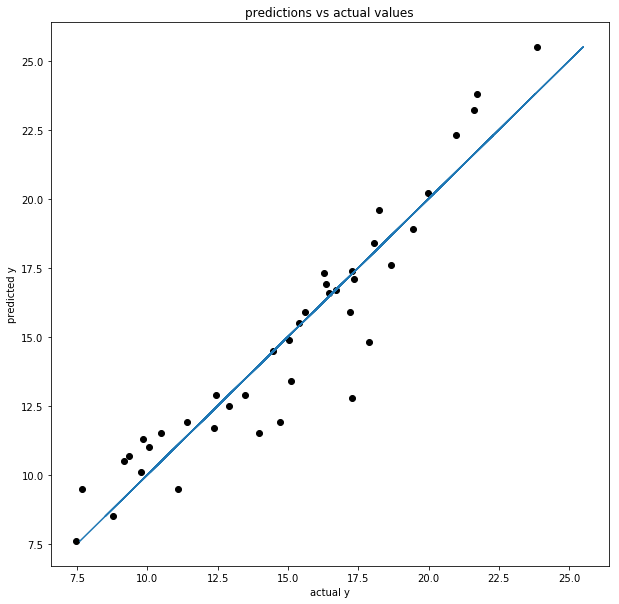

In [21]:
# Code here
plt.figure(figsize=(10,10))
plt.title('predictions vs actual values')
plt.plot(regr.predict(x_test),y_test,'o', color='black')
plt.ylabel("predicted y")
plt.xlabel("actual y")
plt.plot(y_test,y_test)
plt.show()
#plt.plot(y_test,y_test)

In [15]:
# Code/explanation here
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(x_test) - y_test) ** 2))

('Coefficients: \n', array([[ 0.0468431 ,  0.17854434,  0.00258619]]))
Residual sum of squares: 1.99


h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

The interpretation:
Holding other variables constant, a unit increase of investment on TV will increase the sales by 0.047.
Holding other variables constant, a unit increase of investment on radio will increase the sales by 0.179.
Holding other variables constant, a unit increase of investment on newspaper will increase the sales by 0.0026. 
we could standadize variable newspaper, TV, radio by subtracting the mean.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

D:\Users\siyi\Anaconda2\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


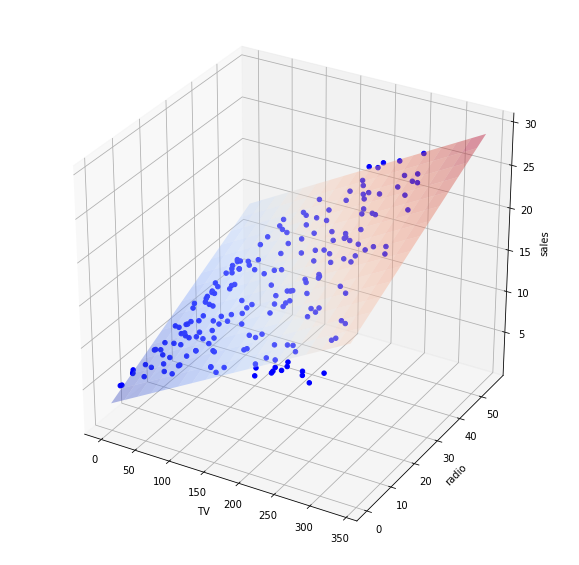

In [16]:
# Type your answer here. 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as pl
import statsmodels.formula.api as sm
from matplotlib import cm

csv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
model = sm.ols(formula='sales ~ TV + radio', data = csv)
fit = model.fit()

fit.summary()

fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20)        
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4,cmap=cm.coolwarm)

ax.scatter(csv['TV'], csv['radio'], csv['sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')

plt.show()

## Problem 3:  Gradient Descent and the learning rate
By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0350749705923, m = 1.47880271753, error = 112.647056643


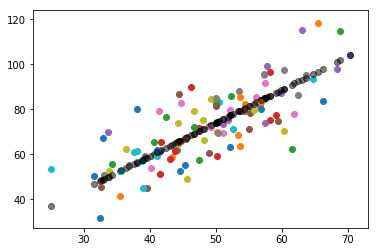

In [36]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations,learning_rate = 0.0001):
    points = genfromtxt("data.csv", delimiter=",")
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0], points[i,1])
        plt.scatter(points[i,0], m*points[i,0]+b,color = 'Black', alpha = 0.5)

run(100)

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 0 iterations b = 0, m = 0, error = 5565.10783448


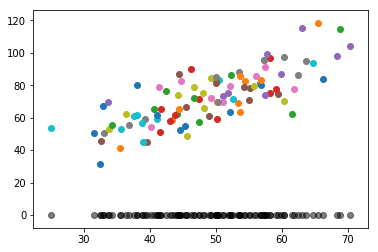

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 1 iterations b = 0.0145470101107, m = 0.737070297359, error = 1484.58655741


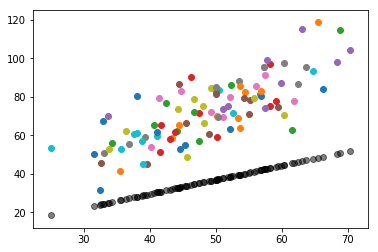

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 2 iterations b = 0.0218739629596, m = 1.10679545435, error = 457.854257574


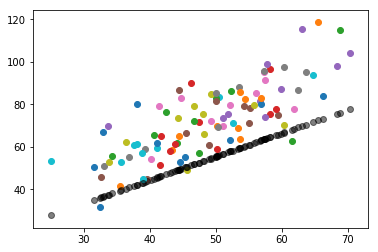

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 3 iterations b = 0.0255792243213, m = 1.29225466491, error = 199.509985726


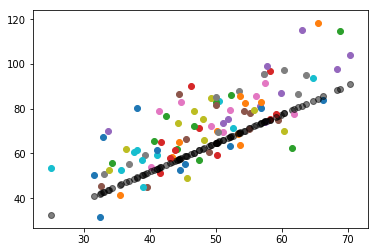

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 4 iterations b = 0.0274677895591, m = 1.38528325565, error = 134.505910582


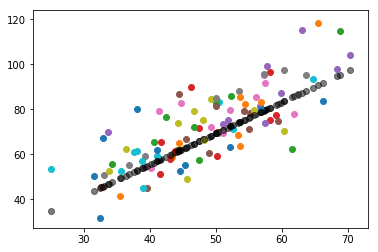

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 5 iterations b = 0.0284450719817, m = 1.43194723238, error = 118.149693422


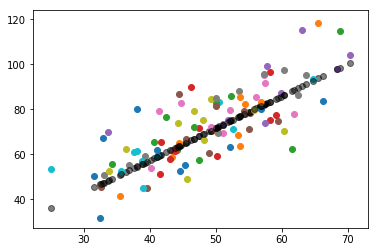

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 6 iterations b = 0.0289652407665, m = 1.4553540089, error = 114.03414906


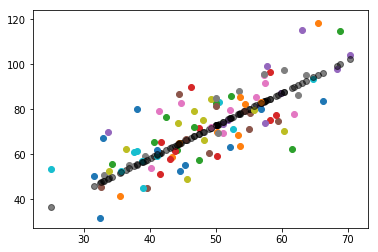

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 7 iterations b = 0.029256114126, m = 1.46709461772, error = 112.998577317


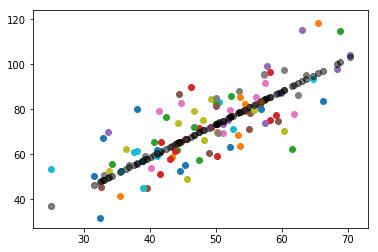

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 8 iterations b = 0.0294319691638, m = 1.47298329822, error = 112.737981876


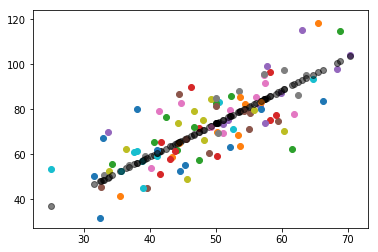

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 9 iterations b = 0.0295501290244, m = 1.4759365619, error = 112.672384359


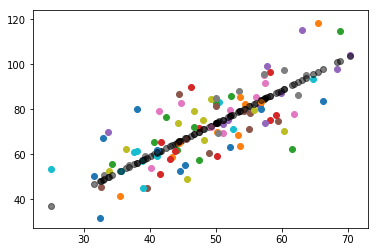

In [37]:
# Use this to visually discuss convergence rate based on learning rate

for num in range(0,10):
    run(num)
    plt.show()

By trials and errors, we conclude that when the learning rate is very large as 1 and very small as 0.000001, it doesn't converge at all. It only converges when an appropriate learning rate is chosen. 

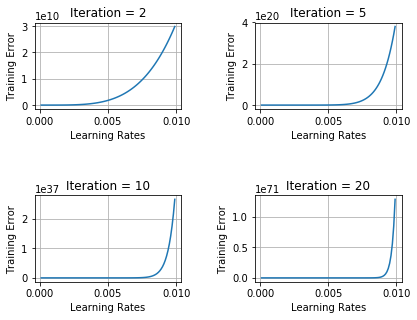

In [24]:
def performance(num, rates):
    points = genfromtxt("data.csv", delimiter=",")
    [b,m]=gradient_descent_runner(points, starting_b=0, starting_m=0, learning_rate=rates, num_iterations=num)
    error=compute_error_for_line_given_points(b, m, points)
    return error


#if number of iteration = 50
learning_rate = np.arange(0.0001,0.01,0.0001)    
error=performance(num=10,rates=learning_rate)
#plot
pl.xlabel('Learning Rates')
pl.ylabel('Training Error')
pl.plot(learning_rate,error)


plt.figure(1)

#if number of iteration = 2
plt.subplot(221)
learning_rate = np.arange(0.0001,0.01,0.0001)    
error=performance(num=2,rates=learning_rate)
#plot
plt.title('Iteration = 2')
pl.xlabel('Learning Rates')
pl.ylabel('Training Error')
pl.plot(learning_rate,error)
plt.grid(True)

#if number of iteration = 5
plt.subplot(222)
learning_rate = np.arange(0.0001,0.01,0.0001)    
error=performance(num=5,rates=learning_rate)
#plot
plt.title('Iteration = 5')
pl.xlabel('Learning Rates')
pl.ylabel('Training Error')
pl.plot(learning_rate,error)
plt.grid(True)

#if number of iteration = 10
plt.subplot(223)
learning_rate = np.arange(0.0001,0.01,0.0001)    
error=performance(num=10,rates=learning_rate)
#plot
plt.title('Iteration = 10')
pl.xlabel('Learning Rates')
pl.ylabel('Training Error')
pl.plot(learning_rate,error)
plt.grid(True)

#if number of iteration = 20
plt.subplot(224)
learning_rate = np.arange(0.0001,0.01,0.0001)    
error=performance(num=20,rates=learning_rate)
#plot
plt.title('Iteration = 20')
pl.xlabel('Learning Rates')
pl.ylabel('Training Error')
pl.plot(learning_rate,error)
plt.grid(True)

plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=0.95, hspace=1, wspace=0.5)


Observing the plot, we may conclude that small learning rate results in lower training error, while large learning rate results in exponential growth of traning error. As iteration increases, we can increase learning rates without increases training error. 